# Phân tích dữ liệu

## Mục tiêu

- Xác định xem `nan-covid-data.csv` có phải là dữ liệu tổng hợp từ các nước thuộc cùng một châu lục hay không
- Trực quan hóa dữ liệu bằng thư viện `matplotlib` và `seaborn`
- Phân tích tình hình dịch ở toàn thế giới nói chung và ở Việt Nam nói riêng

## Các thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## So sánh dữ liệu từ `nan-covid-data.csv` và dữ liệu trên từng châu lục

In [2]:
SRC_LINK = Path('./data/')


In [3]:
nan_df = pd.read_csv(SRC_LINK / 'nan-covid-data.csv', parse_dates=['date'])
nan_df.head()

,iso_code,continent,location,date,total_cases,new_cases
0,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0
1,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0
2,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0
3,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0
4,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0


In [4]:
def check_validate(filename: str, nan_df, location: str):
    df = pd.read_csv(SRC_LINK / filename, parse_dates=['date'])
    query_by_location = nan_df.query(f"location == '{location}'")
    cols = ['date', 'total_cases', 'new_cases']
    check_df, check_from_nan_df = df[cols], query_by_location[cols]
    groups = check_df.groupby('date', as_index=False).sum()
    check = groups.set_index('date').resample('D').sum()
    min_date = check_from_nan_df['date'].dt.date.min()
    check = check[check.index >= str(min_date)]
    check_from_nan_df.set_index('date', inplace=True)
    check_from_nan_df = check_from_nan_df.resample('D').sum()
    check_from_nan_df = check_from_nan_df[check_from_nan_df.index >= str(min_date)]
    return check.equals(check_from_nan_df), check, check_from_nan_df

In [5]:
set_of_continent = [
    ('africa-data.csv', 'Africa'),
    ('asia-data.csv', 'Asia'),
    ('europe-data.csv', 'Europe'),
    ('north-america-data.csv', 'North America'),
    ('oceania-data.csv', 'Oceania'),
    ('south-america-data.csv', 'South America')
]

In [6]:
for filename, name in set_of_continent:
    print(check_validate(filename, nan_df, name)[0])

True
True
True
True
False
True


Có một tập dữ liệu trả ra là False, vậy chúng ta cần kiểm tra dữ liệu đó để hiểu tại sao lại vậy

In [7]:
valid, df1, df2= check_validate(set_of_continent[4][0], nan_df, set_of_continent[4][1])
valid

False

In [8]:
df1.head()

,total_cases,new_cases
date,,
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0
2020-01-30,9.0,3.0


In [9]:
df2.head()

,total_cases,new_cases
date,,
2020-01-25,0.0,0.0
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0


Lý do ở đây có lẽ là vì ngày bắt đầu là từ ngày `25-01-2020` vậy chúng ta thử drop nó đi và so sánh lại

In [10]:
df2 = df2.iloc[1:, :]
df2

,total_cases,new_cases
date,,
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0
2020-01-30,9.0,3.0
...,...,...
2022-03-01,3642267.0,47727.0
2022-03-02,3706274.0,64007.0
2022-03-03,3755862.0,49588.0


In [11]:
df2.equals(df1)

True

Kết quả trả ra là `True` nên kết luận rằng tập `nan-covid-data.csv` là tổng hợp của các tệp dữ liệu nhỏ hơn mà ta chia ra từ bước 1

## Trực quan hóa dữ liệu

Từ bước phía trên, chúng ta đã nhận định được rằng dữ liệu từ tập `nan-covid-data.csv` là tổng hợp của các dữ liệu của các tập bé hơn. Giờ chúng ta sẽ bắt đầu trực quan dữ liệu sử dụng thư viện `matplotlib` và `seaborn` để có góc nhìn "tường minh" hơn về dữ liệu

In [57]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,10)


In [12]:
def preprocessing_dataframe(df):
    cols = ['location', 'date', 'total_cases', 'new_cases']
    df = df[cols]
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

In [13]:
keys = [
    ('africa', 'Africa'),
    ('asia', 'Asia'),
    ('europe', 'Europe'),
    ('north_america', 'North America'),
    ('oceania', 'Oceania'),
    ('south_america', 'South America')
]
data_dict = {}

for key, name in keys:
    query_by_location = nan_df.query(f"location == '{name}'")
    data_dict[key] = query_by_location

In [14]:
for key in data_dict:
    data_dict[key] = preprocessing_dataframe(data_dict[key])

In [15]:
data_dict['africa'].head()

,location,total_cases,new_cases
date,,,
2020-02-13,Africa,NaN,0.0
2020-02-14,Africa,1.0,1.0
2020-02-15,Africa,1.0,0.0
2020-02-16,Africa,1.0,0.0
2020-02-17,Africa,1.0,0.0


In [16]:
data_dict['asia'].head()

,location,total_cases,new_cases
date,,,
2020-01-22,Asia,556.0,0.0
2020-01-23,Asia,654.0,98.0
2020-01-24,Asia,937.0,283.0
2020-01-25,Asia,1429.0,492.0
2020-01-26,Asia,2105.0,676.0


In [17]:
for key in data_dict:
    print(min(data_dict[key].index))

2020-02-13 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-22 00:00:00
2020-01-25 00:00:00
2020-02-22 00:00:00


### So sánh tổng số ca nhiễm

#### Tổng số ca nhiễm **Covid-19** theo từng châu lục (bar chart)

In [89]:
total_cases = []
countries = [k.replace('_', ' ').title() for k in data_dict]
for key in data_dict:
    total_cases.append(
        data_dict[key]['total_cases'].iloc[-1]/1e7
    )

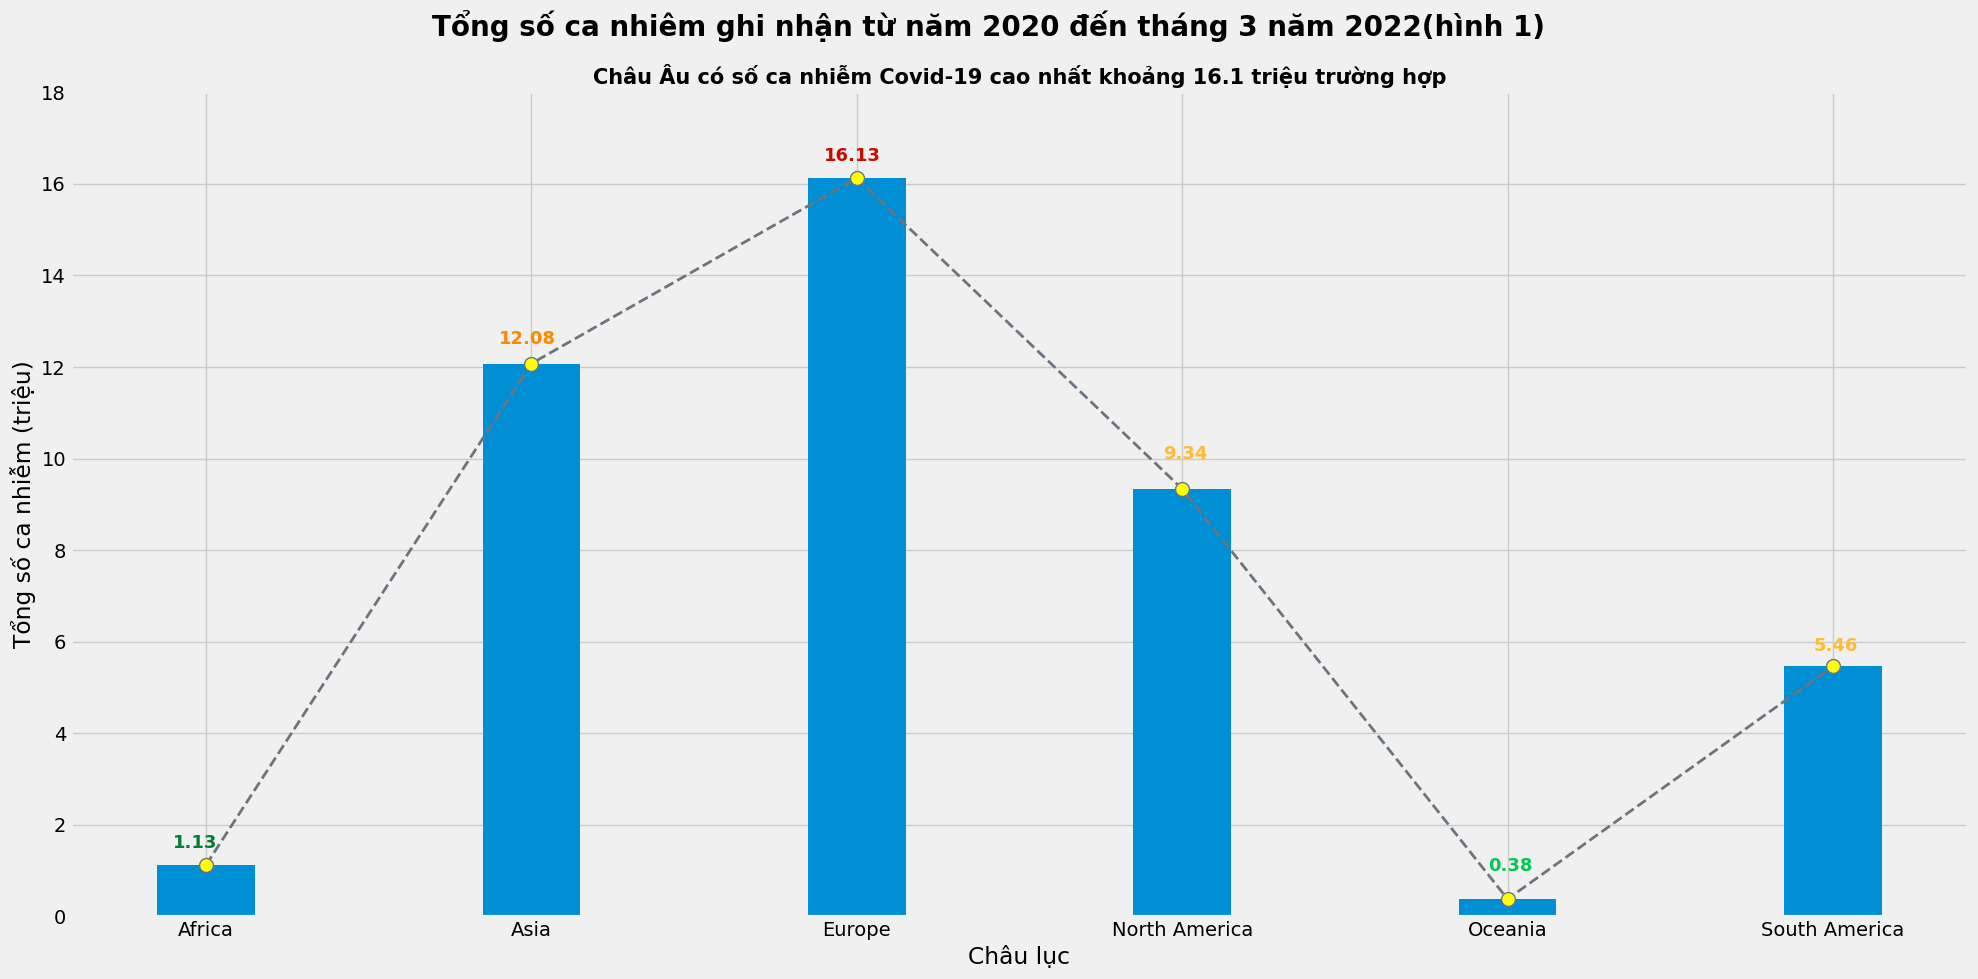

In [149]:
plt.bar(countries, total_cases, width=0.3)
plt.plot(countries, total_cases, marker='o', linestyle='--', color='#6c757d', ms=10, linewidth=2, mfc='yellow')
plt.suptitle("Tổng số ca nhiêm ghi nhận từ năm 2020 đến tháng 3 năm 2022(hình 1)", fontsize=20, weight='bold')
plt.title("Châu Âu có số ca nhiễm Covid-19 cao nhất khoảng 16.1 triệu trường hợp", fontsize=15, weight='bold')
plt.ylabel("Tổng số ca nhiễm (triệu)")
plt.xlabel("Châu lục")
plt.ylim(0, 18)
plt.text(-.1, 1.5, f"{round(total_cases[0], 2)}", fontsize=13, color='#007E33', weight='bold')
plt.text(1-.1, 12.5, f"{round(total_cases[1], 2)}", fontsize=13, color='#FF8800', weight='bold')
plt.text(2-.1, 16.5, f"{round(total_cases[2], 2)}", fontsize=13, color='#CA0B00', weight='bold')
plt.text(3-.06, 10, f"{round(total_cases[3], 2)}", fontsize=13, color='#ffbb33', weight='bold')
plt.text(4-.06, 1, f"{round(total_cases[4], 2)}", fontsize=13, color='#00c851', weight='bold')
plt.text(5-.06, 5.8, f"{round(total_cases[5], 2)}", fontsize=13, color='#ffbb33', weight='bold')

plt.tight_layout()
plt.show()

- Từ biểu đồ cột có thể thấy rằng, *Châu Âu* là vùng có tổng số ca nhiễm nhiều nhất tính từ năm 2020 đến tháng 3 năm 2022 khoảng **16.1 triệu** ca nhiễm
- Sau đó là khu vực *Châu Á* khoảng **12 triệu** ca nhiễm và khu vực *Bắc Mỹ* khoảng **9.3 triệu** ca nhiễm
- Hai khu vực chịu ít ảnh hưởng nhất là khu vực *Châu Phi* và *Châu Đại Dương*

Để lý giải cho những số liệu trên biểu đồ (hình 1), nhóm có một vài nhận định sau:
- Dân số ở khu vực *Châu Phi* và *Châu Đại Dương* mật độ dân số thấp hơn các khu vực khác, cụ thể mật độ dân số ở *Châu Phi* là 45-47 người trên mỗi $km^2$ (2022) và mật độ dân số ở *Châu Đại Dương* là 3.6 người trên mỗi $km^2$. Dân số thưa dẫn đến việc lây lan sẽ ít hơn
- Trong đó, dân số ở *Châu Á* là 4.75 tỷ người (2022), *Châu Âu* là 747.2 triệu người và *Châu Mỹ* khoảng 1.1 tỷ người
- Vậy tại sao ởChâu Âu hay Châu Mỹ dân số ít hơn nhưng tổng số ca nhiễm lại nhiều hơn?

#### Tốc độ tăng trưởng của dịch **Covid-19** qua từng châu lục (line chart)

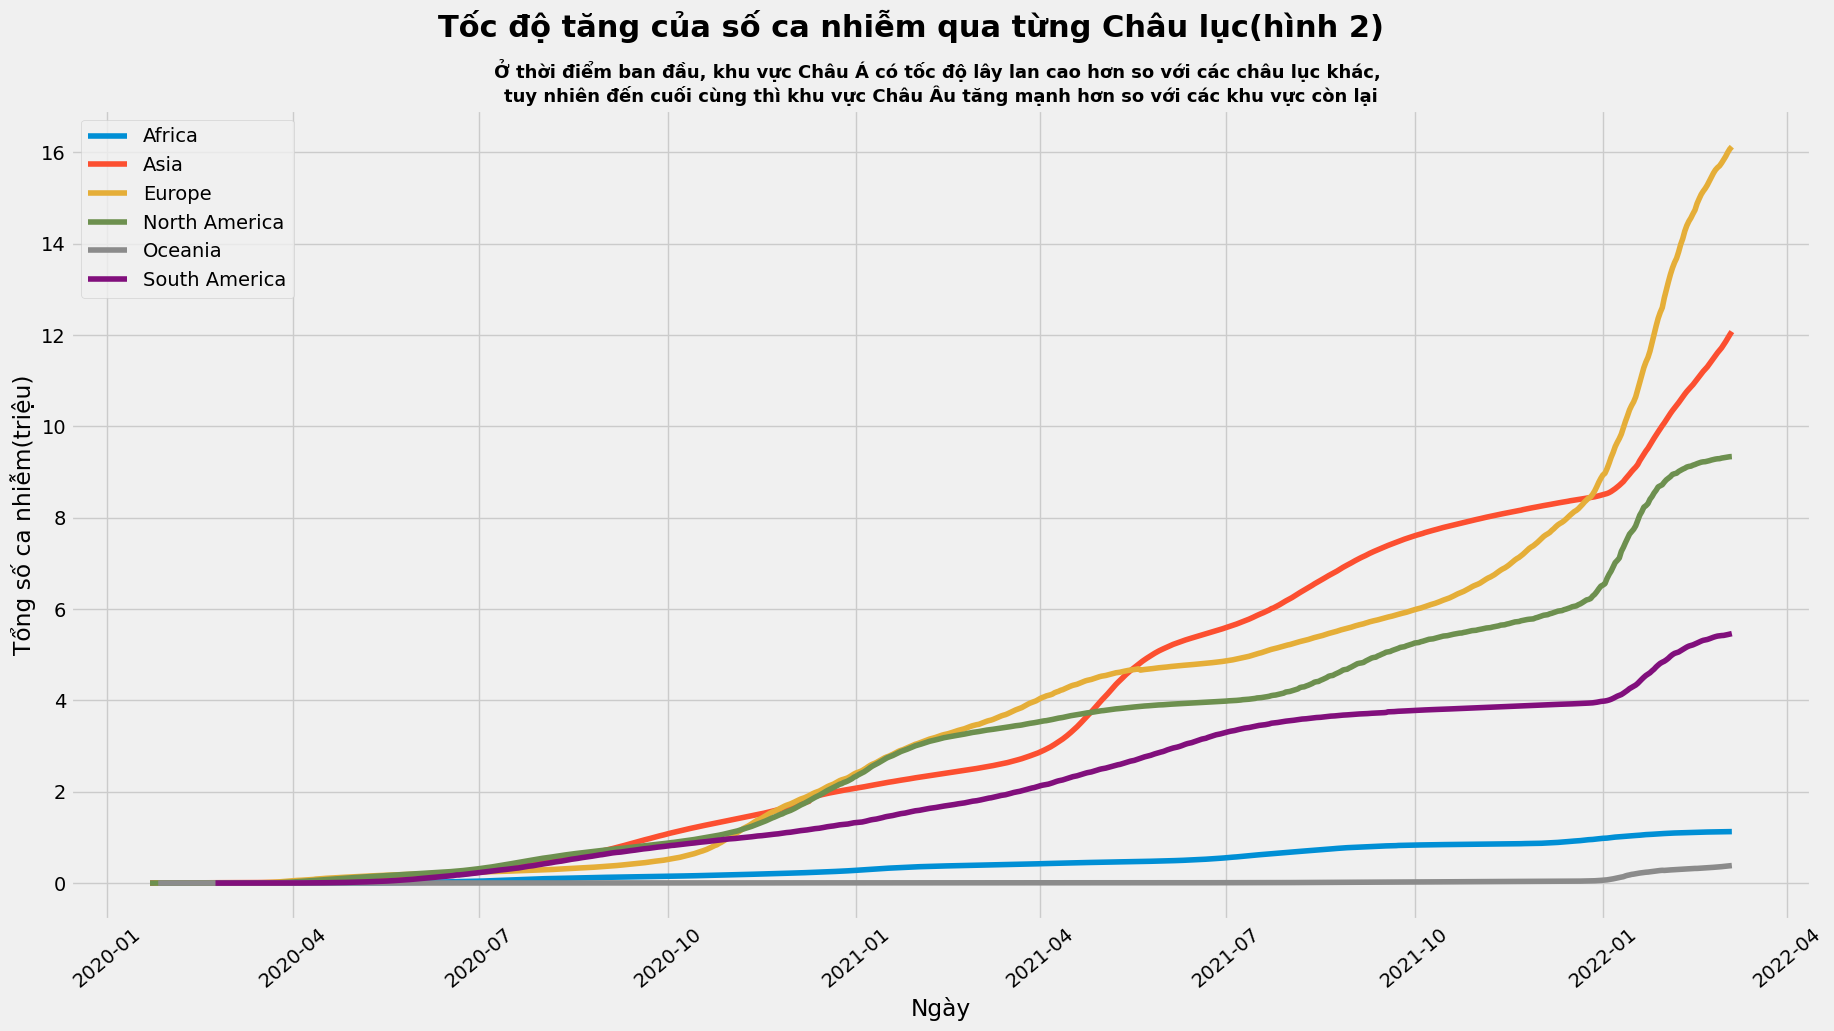

In [150]:
for key in data_dict:
    total_cases = data_dict[key].total_cases / 1e7
    plt.plot(total_cases, label=key.replace('_', ' ').title())
    
plt.xticks(rotation=40)
plt.suptitle("Tốc độ tăng của số ca nhiễm qua từng Châu lục(hình 2)", fontsize=22, weight='bold')
plt.title("Ở thời điểm ban đầu, khu vực Châu Á có tốc độ lây lan cao hơn so với các châu lục khác, \
\ntuy nhiên đến cuối cùng thì khu vực Châu Âu tăng mạnh hơn so với các khu vực còn lại", fontsize=13, weight='bold')
plt.xlabel('Ngày')
plt.ylabel("Tổng số ca nhiễm(triệu)")
plt.legend()
plt.show()
    # data_dict['africa'].index

#### Số ca nhiễm mới ghi nhận theo từng ngày

In [152]:
data_dict['asia'].new_cases

date
2020-01-22         0.0
2020-01-23        98.0
2020-01-24       283.0
2020-01-25       492.0
2020-01-26       676.0
                ...   
2022-03-01    669619.0
2022-03-02    694579.0
2022-03-03    771984.0
2022-03-04    724389.0
2022-03-05    687653.0
Name: new_cases, Length: 774, dtype: float64